## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Read the mouse data and the study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_mouse_study_results_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_mouse_study_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
number_mice = combined_mouse_study_results_df['Mouse ID'].nunique()
print(number_mice)

249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_mouse_study_results_df[combined_mouse_study_results_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_mouse_study_results_df.loc[combined_mouse_study_results_df['Mouse ID'] == 'g989']
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_results_df = combined_mouse_study_results_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep = "first")
clean_mouse_study_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_number_mice = clean_mouse_study_results_df['Mouse ID'].nunique()
print(clean_number_mice)

249


In [10]:
# Check Data Types
clean_mouse_study_results_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_mouse_study_df = clean_mouse_study_results_df.groupby(['Drug Regimen'])
grouped_mouse_study_df.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186


In [12]:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = grouped_mouse_study_df['Tumor Volume (mm3)'].mean()
median = grouped_mouse_study_df['Tumor Volume (mm3)'].median()
variance = grouped_mouse_study_df['Tumor Volume (mm3)'].var()
std = grouped_mouse_study_df['Tumor Volume (mm3)'].std()
sem = grouped_mouse_study_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
drug_tumor_summary_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': std, 'SEM': sem})
drug_tumor_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
dt_summary_df = grouped_mouse_study_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
dt_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

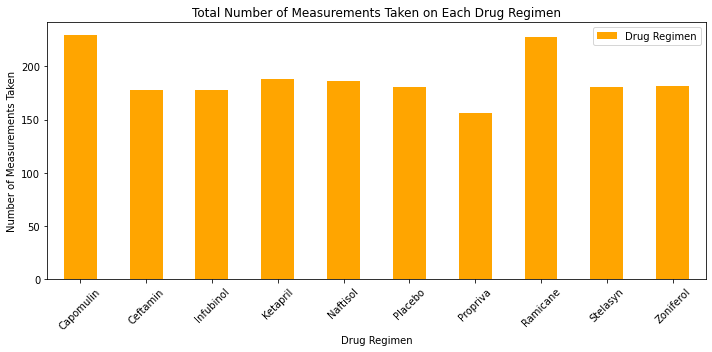

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count = grouped_mouse_study_df['Tumor Volume (mm3)'].count()
count.plot(kind = 'bar', color = 'orange', figsize = (10,5), title = 'Total Number of Measurements Taken on Each Drug Regimen')
plt.xticks(rotation = 45)
plt.ylabel('Number of Measurements Taken')
drug_regimen = ["Drug Regimen"]
plt.legend(drug_regimen, loc="best")
plt.tight_layout()

# Save Plot
plt.savefig('pandas_bar_chart')

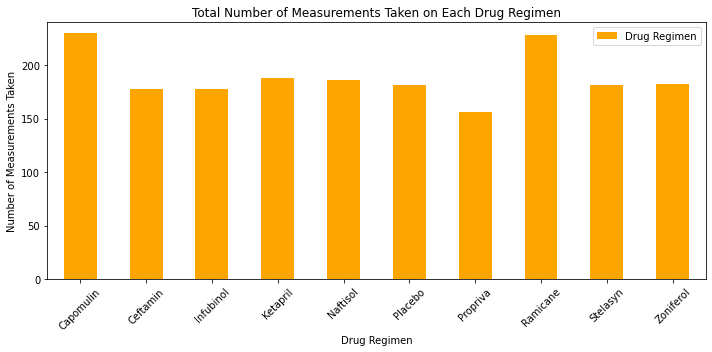

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis =  np.arange(len(count))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, count, color = 'orange', align = "center", width = 0.5)
plt.xticks(tick_locations, list(count.index), rotation = 45)
plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(count)+10)
plt.title('Total Number of Measurements Taken on Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements Taken')
plt.legend(drug_regimen, loc="best")
plt.tight_layout()


# Save Plot
plt.savefig('pyplot_bar_chart')

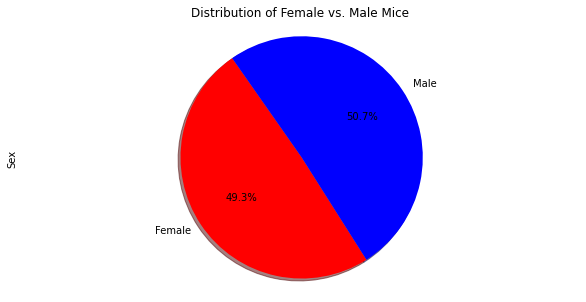

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender_df = clean_mouse_study_results_df.groupby(['Sex'])
gender = grouped_gender_df['Sex'].count()

gender.plot(kind = 'pie', figsize = (10,5), title = 'Distribution of Female vs. Male Mice',  autopct = '%1.1f%%', startangle = 125, shadow = True, colors = ['red', 'blue'])
plt.axis('equal')

# Save Plot
plt.savefig('pandas_pie_chart')

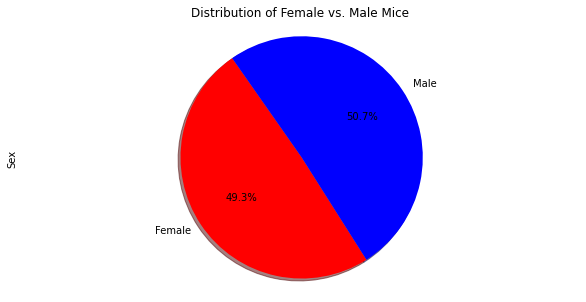

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender.index
colors = ["red", "blue"]
plt.figure(figsize=(10,5))
plt.pie(gender, explode = (0,0), labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 125, radius = 1)
plt.title('Distribution of Female vs. Male Mice')
plt.ylabel('Sex')
plt.axis('equal')


# Save Plot
plt.savefig('pyplot_pie_chart')

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Copy Clean Mouse Study Results Data Frame to create new data frame
study_results_df = clean_mouse_study_results_df.copy()

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_mouse_df = study_results_df.groupby('Mouse ID')['Timepoint'].max().sort_values()
greatest_timepoint_mouse_df = greatest_timepoint_mouse_df.reset_index()
greatest_timepoint_mouse_df = greatest_timepoint_mouse_df.rename(columns = {'Timepoint': 'Max Timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tummor_treatment_df = pd.merge(study_results_df, greatest_timepoint_mouse_df, on = 'Mouse ID', how = "left")
tummor_treatment_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2,45
1884,z969,Naftisol,Male,9,30,30,65.841013,3,45
1885,z969,Naftisol,Male,9,30,35,69.176246,4,45
1886,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
treatment_list = []   

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    drug_treatment_df = tummor_treatment_df.loc[tummor_treatment_df['Drug Regimen'] == treatment]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume_df = drug_treatment_df.loc[drug_treatment_df['Timepoint'] == drug_treatment_df['Max Timepoint']]
    treatment_values = final_tumor_volume_df['Tumor Volume (mm3)']
    treatment_list.append(treatment_values)
    
    # Quartile calculations
    quartiles = treatment_values.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25], 4)
    upperq = round(quartiles[0.75], 4)
    median = round(quartiles[0.5], 4)
    iqr = round((upperq - lowerq), 4)
    
    # Determine outliers using upper and lower bounds
    lower_bound = round((lowerq - (1.5*iqr)), 4)
    upper_bound = round((upperq + (1.5*iqr)), 4)
    outliers = treatment_values.loc[(final_tumor_volume_df['Tumor Volume (mm3)'] < lower_bound) | (final_tumor_volume_df['Tumor Volume (mm3)'] > upper_bound)]
    
    # Print out quartile data
    print(f'......')
    print(f'Data for {treatment}:')
    print(f'Lower Quartile: {lowerq}')
    print(f'Upper Quartile: {upperq}')
    print(f'Median: {median}')
    print(f'IQR is: {iqr}')  
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}')
    print(f'......')
    

......
Data for Capomulin:
Lower Quartile: 32.3774
Upper Quartile: 40.1592
Median: 38.1252
IQR is: 7.7818
Lower Bound: 20.7047
Upper Bound: 51.8319
......
......
Data for Ramicane:
Lower Quartile: 31.5605
Upper Quartile: 40.659
Median: 36.5617
IQR is: 9.0985
Lower Bound: 17.9128
Upper Bound: 54.3067
......
......
Data for Infubinol:
Lower Quartile: 54.0486
Upper Quartile: 65.5257
Median: 60.1652
IQR is: 11.4771
Lower Bound: 36.8329
Upper Bound: 82.7414
......
......
Data for Ceftamin:
Lower Quartile: 48.7221
Upper Quartile: 64.2998
Median: 59.852
IQR is: 15.5777
Lower Bound: 25.3555
Upper Bound: 87.6664
......


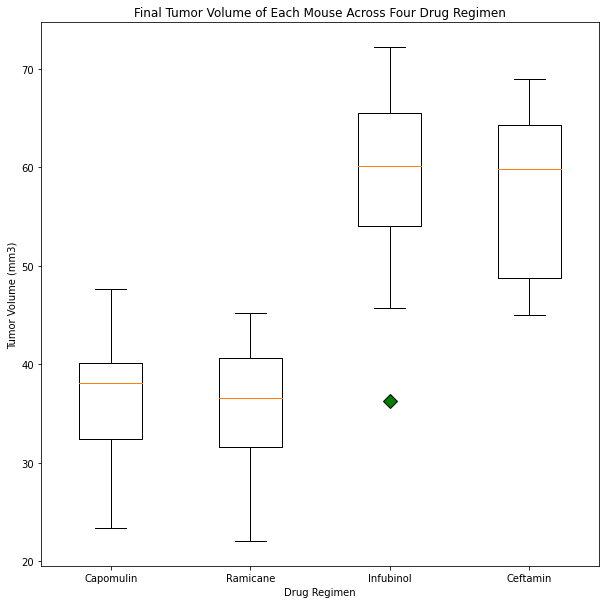

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='D', markerfacecolor='g', markersize=10, markeredgecolor='black')
fig1, ax1 = plt.subplots(figsize = (10,10))
ax1.set_title('Final Tumor Volume of Each Mouse Across Four Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(treatment_list, flierprops = flierprops)
plt.xticks([1,2,3,4], treatments)

# Save Plot
plt.savefig('box_plot')

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Identify data points for s185
capomulin_x401 = clean_mouse_study_results_df.loc[clean_mouse_study_results_df['Mouse ID'] == 'x401']
capomulin_x401


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0


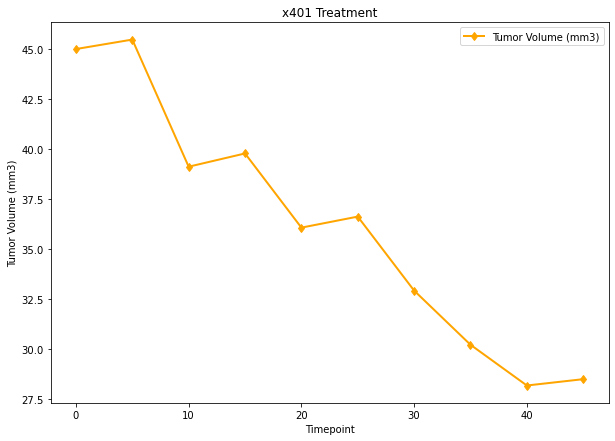

In [22]:
# Plot s185 data
plt.figure(figsize=(10,7))
plt.plot(capomulin_x401['Timepoint'], capomulin_x401['Tumor Volume (mm3)'], marker = 'd', color = 'Orange', linewidth = 2)
plt.title('x401 Treatment')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
tumor_volume = ['Tumor Volume (mm3)']
plt.legend(tumor_volume, loc = 'best')

# Save Plot
plt.savefig('line_plot')

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_mouse_study_results_df.loc[clean_mouse_study_results_df['Drug Regimen'] == 'Capomulin']

# Start by getting the last average tumor size for Capomulin regimen
tumor_volume = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()
tumor_volume = tumor_volume.reset_index()
tumor_volume = tumor_volume.rename(columns = {'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

# Merge this group df with the original dataframe and drop duplicates
avg_tumor_volume = pd.merge(capomulin, tumor_volume, on = 'Mouse ID', how = "left")
clean_tumor_volume = avg_tumor_volume[['Weight (g)', 'Average Tumor Volume (mm3)']].drop_duplicates()
clean_tumor_volume

,Weight (g),Average Tumor Volume (mm3)
0,17,34.559143
10,15,36.182040
20,17,34.847470
30,17,36.505973
35,17,39.887495
45,17,38.506829
55,17,36.509212
65,19,39.049816
75,17,39.328725
85,20,39.141053


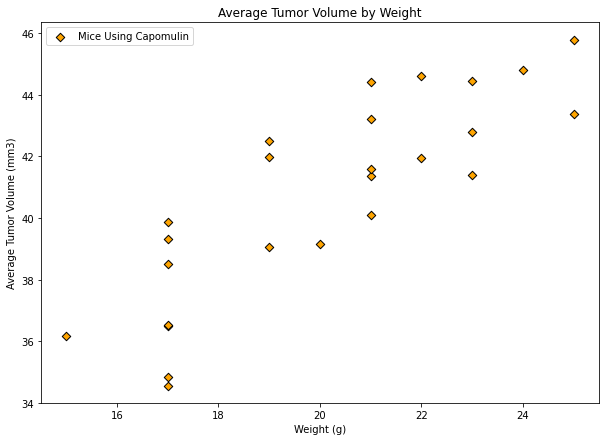

In [24]:
# Plot Capomulin data
plt.figure(figsize=(10,7))
plt.scatter(clean_tumor_volume['Weight (g)'], clean_tumor_volume['Average Tumor Volume (mm3)'], marker = 'D', facecolors = 'Orange', edgecolors = 'black')
plt.title('Average Tumor Volume by Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
mice = ['Mice Using Capomulin']
plt.legend(mice, loc = 'best')

# Save Plot
plt.savefig('scatter_plot')

## Correlation and Regression

The correlation between average tumor volume by weight is 0.84


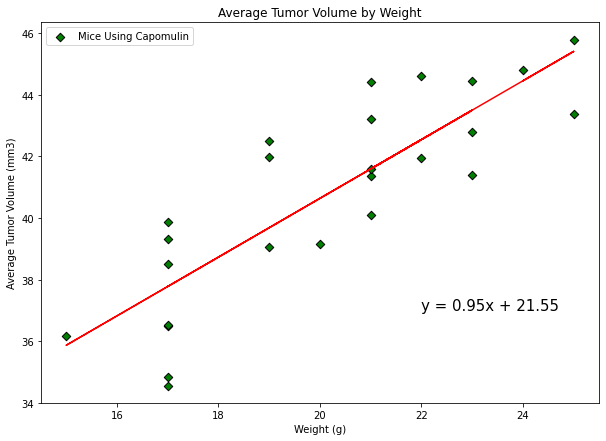

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(clean_tumor_volume['Weight (g)'],clean_tumor_volume['Average Tumor Volume (mm3)'])
correlation = round(correlation[0],2)

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_tumor_volume['Weight (g)'], clean_tumor_volume['Average Tumor Volume (mm3)'])
regress_values = (clean_tumor_volume['Weight (g)']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot Capomulin data
plt.figure(figsize=(10,7))
plt.scatter(clean_tumor_volume['Weight (g)'], clean_tumor_volume['Average Tumor Volume (mm3)'], marker = 'D', facecolors = 'Green', edgecolors = 'black')
mice = ['Mice Using Capomulin']
plt.legend(mice, loc = 'best')
plt.title('Average Tumor Volume by Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Plot linear regression
plt.plot((clean_tumor_volume['Weight (g)']),regress_values,"r-")
plt.annotate(line_eq, (22,37), fontsize=15, color="black")

print(f'The correlation between average tumor volume by weight is {correlation}')

# Save Plot
plt.savefig('correlation_regression_plot')